In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importo los datos correspondientes a el Resumen con información general de los tickets de la fase 1 de la campaña con información sobre el usuario
    #Pasamos de un Excel a un CSV
df = pd.read_csv('tktGelt.csv' , sep= ";", encoding = 'latin-1')
df

,ticket_id,cliente_id,Buy Date,Buy Hour,shop_name,Sexo,Nro Adultos,Nro Niños,Mascota,Baby Boomers,Tipo de Hogar,Ciudad,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2534466,102204264,20/12/2021,18:08:00,COTO,sin info,sin info,sin info,sin info,Baby Boomers,sin info,sin info,NaN,NaN,NaN,NaN,NaN,NaN
1,2544312,1019685,21/12/2021,9:35:00,COTO,sin info,sin info,sin info,sin info,Baby Boomers,sin info,sin info,NaN,NaN,NaN,NaN,NaN,NaN
2,2547282,1039679,21/12/2021,13:12:00,COTO,Mujer,2,0,Perro,Baby Boomers,parejas,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN
3,2549184,1135034,21/12/2021,13:38:00,CARREFOUR,Hombre,2,0,0,Baby Boomers,parejas,Parana,NaN,NaN,NaN,NaN,NaN,NaN
4,2550015,1063748,21/12/2021,15:52:00,CARREFOUR,Hombre,2,2,Perro,Baby Boomers,familias,Olavarria,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,3102338,101942880,17/01/2022,13:40:00,COTO,Hombre,1,2,Perro,sin info,solteros con hijos,Lomas Del Mirador,NaN,NaN,NaN,NaN,NaN,NaN
342,3104771,102233526,17/01/2022,17:06:00,COTO,Mujer,2,0,0,sin info,parejas,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN
343,3106223,1045243,17/01/2022,19:18:00,COTO,Hombre,1,0,Perro,sin info,solteros,Tigre,NaN,NaN,NaN,NaN,NaN,NaN
344,3109190,1081717,17/01/2022,20:05:00,CARREFOUR,Mujer,4,1,Otros,sin info,familias,Tablada,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Conocemos el numero total de registros correspondientes a los datos del periodo
df.shape

(346, 18)

In [4]:
df.cliente_id.unique().shape
#Podemos notar que existen clientes que registraron mas de una compra en este periodo

(299,)

In [5]:
#Renombramos la columna de interes
df.rename(columns = {'Baby Boomers': 'description'}, inplace = True)

In [6]:
#Eliminamos los duplicados del dataframe para poder analizar objetivamente el publico
df_ = df.drop_duplicates(subset = ['cliente_id'])
df_.shape

(299, 18)

In [7]:
#Analizamos el rango etario que mas utiliza la app 
df_['description'].value_counts()

Millenials      139
GeneraciónX      59
GeneraciónZ      41
Baby Boomers     33
sin info         24
Otros             2
Generación        1
Name: description, dtype: int64

In [8]:
np.unique(df_['description'].values)

array(['Baby Boomers', 'Generación', 'GeneraciónX', 'GeneraciónZ',
       'Millenials', 'Otros', 'sin info'], dtype=object)

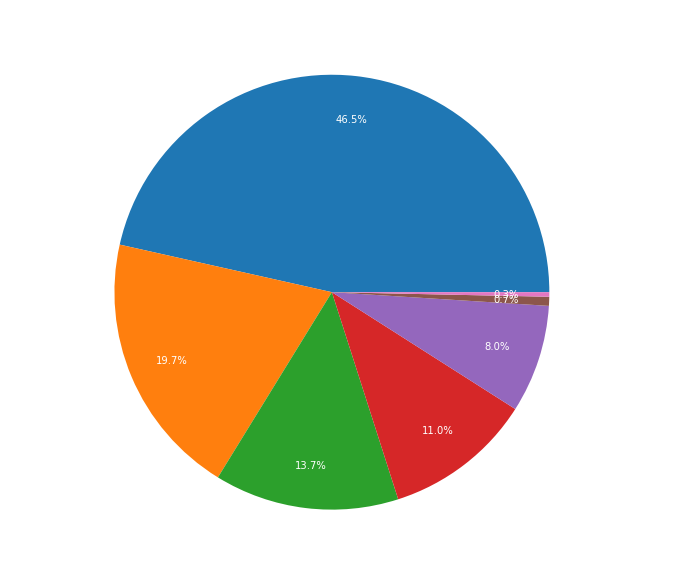

In [9]:
plt.figure(figsize=(10,10))
plt.pie(df_['description'].value_counts(), labels = df_['description'].value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [10]:
#Analizamos cuales son los locales que nuestro publico utiliza
np.unique (df_.shop_name.values)

array(['CARREFOUR', 'CHANGOMAS', 'COTO', 'WALMART'], dtype=object)

In [11]:
#Analizams cuales son los locales mas concurridos por nuestros usuarios
df_.shop_name.value_counts()

CARREFOUR    140
COTO          90
CHANGOMAS     59
WALMART       10
Name: shop_name, dtype: int64

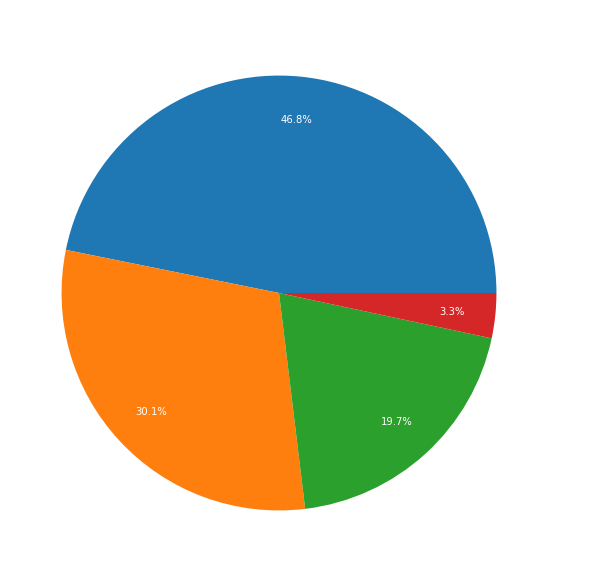

In [12]:
#Vemos graficamente cuales son los locales mas concurridos
plt.figure(figsize=(10,10))
plt.pie(df_.shop_name.value_counts(), labels = df_.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [13]:
#Generamos un dataframe para el rango etario mayoritario
df_M = df_[df_.description == 'Millenials']
df_M

,ticket_id,cliente_id,Buy Date,Buy Hour,shop_name,Sexo,Nro Adultos,Nro Niños,Mascota,description,Tipo de Hogar,Ciudad,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
151,2886718,1155877,06/01/2022,20:17:00,WALMART,Hombre,1,0,0,Millenials,solteros,Ciudad Evita,NaN,NaN,NaN,NaN,NaN,NaN
152,2888839,101948473,06/01/2022,12:46:00,COTO,sin info,sin info,sin info,sin info,Millenials,sin info,sin info,NaN,NaN,NaN,NaN,NaN,NaN
153,2889988,101896254,04/01/2022,21:57:00,CHANGOMAS,Hombre,2,0,Gato,Millenials,parejas,Resistencia,NaN,NaN,NaN,NaN,NaN,NaN
154,2890960,102501634,06/01/2022,10:01:00,COTO,Mujer,2,0,0,Millenials,parejas,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN
155,2894695,102026815,07/01/2022,11:42:00,CARREFOUR,Hombre,1,0,Gato,Millenials,solteros,Lanus,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,3050513,1166625,14/01/2022,14:32:00,CHANGOMAS,Hombre,1,0,0,Millenials,solteros,Carbometal,NaN,NaN,NaN,NaN,NaN,NaN
306,3054638,1154453,14/01/2022,17:16:00,COTO,Hombre,2,0,0,Millenials,parejas,Rosario,NaN,NaN,NaN,NaN,NaN,NaN
307,3055868,1108411,14/01/2022,16:59:00,COTO,Mujer,2,0,0,Millenials,parejas,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN
308,3055934,1083750,12/01/2022,20:28:00,CHANGOMAS,Hombre,3,0,Gato,Millenials,3 o más adultos,Mota Botello,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_M.shape

(139, 18)

In [15]:
#Analizo cuales son los locales mas concurridos por el pubico de mayor volumen
df_M.shop_name.value_counts()

CARREFOUR    57
COTO         49
CHANGOMAS    28
WALMART       5
Name: shop_name, dtype: int64

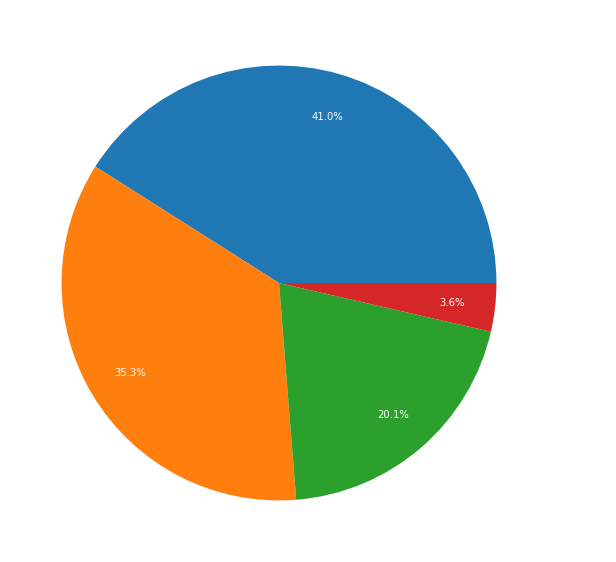

In [16]:
plt.figure(figsize=(10,10))
plt.pie(df_M.shop_name.value_counts(), labels = df_M.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [17]:
df[['cliente_id']].duplicated().sum()
#Podemos ver que los clientes que volvieron a comprar solo lo hicieron una vez

47

In [18]:
df[['cliente_id']].loc[df[['cliente_id']].duplicated()]
#Encuentro los clientes que compraron dos veces en la primer campaña

,cliente_id
30,1155883
39,1046770
41,102268602
44,102143772
56,1135034
64,1073002
65,102184272
74,1120716
75,1021254
81,102398131


In [19]:
df_2 = df.loc[df[['cliente_id']].duplicated()]
df_2.shape

(47, 18)

In [20]:
#Analizo a que rango etario corresponden los clientes que volvieron a comprar dentro del mismo periodo
df_2.description.value_counts()

Millenials      20
GeneraciónX     11
sin info         9
GeneraciónZ      5
Baby Boomers     1
Otros            1
Name: description, dtype: int64

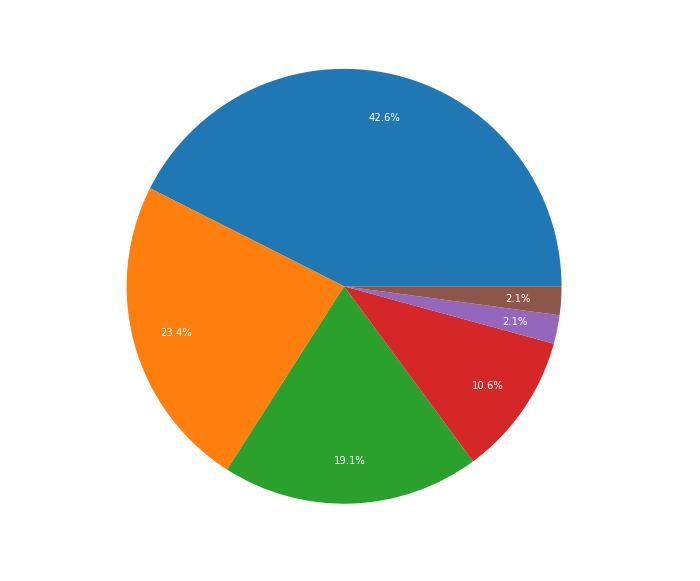

In [21]:
plt.figure(figsize=(10,10))
plt.pie(df_2.description.value_counts(), labels = df_2.description.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [22]:
#Analizo donde compraron las personas que repitieron 
df_2.shop_name.value_counts()

CARREFOUR    26
COTO         14
CHANGOMAS     5
WALMART       2
Name: shop_name, dtype: int64

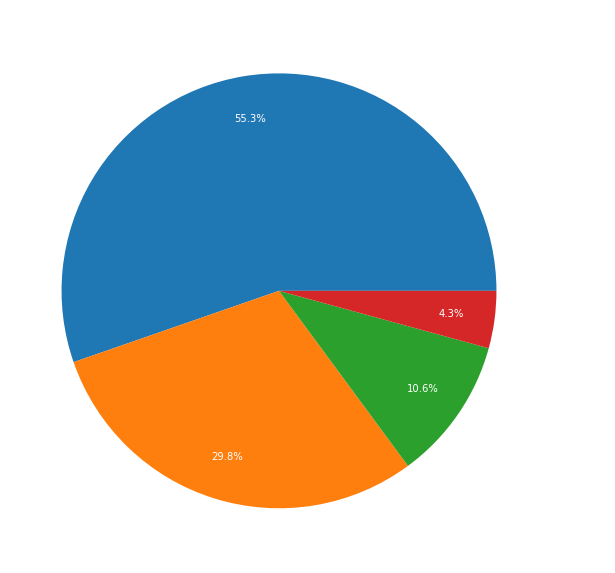

In [23]:
plt.figure(figsize=(10,10))
plt.pie(df_2.shop_name.value_counts(), labels = df_2.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [24]:
df_2.duplicated().sum()
#No se encuentran duplicados, lo que refleja que nadie repitio mas de una vez en este periodo

0

In [41]:
#Analizo la demografica de los consumidores
print(df_.Ciudad.value_counts().shape)
df_.Ciudad.value_counts().head(15)
#No puedo concluir nada con estos resultados mas alla de que los principales datos provienen de Buenos Aires

(120,)


Buenos Aires       70
sin info           32
Parana              6
Rosario             6
Salta               5
Corrientes          5
Cordoba             5
Ramos Mejia         4
Bahia Blanca        4
Merlo               4
Villa Ballester     4
Lomas De Zamora     4
Mendoza             4
La Plata            4
Neuquen             3
Name: Ciudad, dtype: int64